In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel(r'/content/DiabetesDiagnosis.xls')
df.head()

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0


In [ ]:
X = df.drop('Diagnosis', axis=1)
Y = df['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=22)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
GNB = GaussianNB()
GNB.fit(Xtrain, Ytrain)
pred = GNB.predict(Xtest)
print(confusion_matrix(Ytest, pred))
print('accuracy:   ', accuracy_score(Ytest, pred))
print('recall:     ', recall_score(Ytest, pred))
print('precision:  ', precision_score(Ytest, pred))
print('f-measure:  ', f1_score(Ytest, pred))
print('auc:        ', roc_auc_score(Ytest, pred))

[[ 30  34]
 [ 18 110]]
accuracy:    0.7291666666666666
recall:      0.859375
precision:   0.7638888888888888
f-measure:   0.8088235294117647
auc:         0.6640625


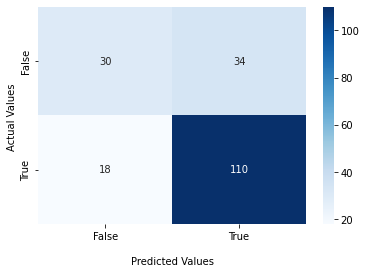

In [ ]:
import seaborn as sns

cf_matrix = confusion_matrix(Ytest, pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print('recall in class 0:                   ', recall_score(Ytest, pred, pos_label=0))
print('precision in class 1:                ', precision_score(Ytest, pred, pos_label=1))
print('average of f-measure in two classes: ', f1_score(Ytest, pred, average='macro'))

recall in class 0:                    0.46875
precision in class 1:                 0.7638888888888888
average of f-measure in two classes:  0.6722689075630253


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=22, shuffle=True, stratify=Y)

GNB = GaussianNB()
GNB.fit(Xtrain, Ytrain)
pred = GNB.predict(Xtest)
print(confusion_matrix(Ytest, pred))
print('accuracy:   ', accuracy_score(Ytest, pred))
print('recall:     ', recall_score(Ytest, pred))
print('precision:  ', precision_score(Ytest, pred))
print('f-measure:  ', f1_score(Ytest, pred))
print('auc:        ', roc_auc_score(Ytest, pred))

[[ 35  32]
 [ 13 112]]
accuracy:    0.765625
recall:      0.896
precision:   0.7777777777777778
f-measure:   0.8327137546468402
auc:         0.7091940298507462


In [ ]:
from sklearn.model_selection import cross_val_predict
GNB = GaussianNB()
pred = cross_val_predict(GNB, X, Y, cv=5)

print(confusion_matrix(Y, pred))
print('accuracy:   ', accuracy_score(Y, pred))

[[157 111]
 [ 80 420]]
accuracy:    0.7513020833333334


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GNB, X, Y, cv=5, scoring='recall')
scores

array([0.84, 0.82, 0.84, 0.85, 0.85])

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
for train_index, test_index in kf.split(X):
  
  Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
  Ytrain, Ytest = Y[train_index], Y[test_index]

  GNB.fit(Xtrain, Ytrain)
  pred = GNB.predict(Xtest)
  print(accuracy_score(Ytest, pred))

0.765625
0.71875
0.78125
0.7604166666666666


In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for train, test in loo.split(X):
  Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
  Ytrain, Ytest = Y[train_index], Y[test_index]

  GNB.fit(Xtrain, Ytrain)
  pred = GNB.predict(Xtest)
  print(accuracy_score(Ytest, pred))

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
for train_index, test_index in skf.split(X, Y):
  
  Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
  Ytrain, Ytest = Y[train_index], Y[test_index]

  GNB.fit(Xtrain, Ytrain)
  pred = GNB.predict(Xtest)
  print(accuracy_score(Ytest, pred))

0.7708333333333334
0.7135416666666666
0.7552083333333334
0.765625


In [ ]:
from sklearn.model_selection import GroupKFold
gkf = GroupKFold(n_splits=5)
for train, test in gkf.split(X, Y, groups=X['Age']):
  Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
  Ytrain, Ytest = Y[train_index], Y[test_index]

  GNB.fit(Xtrain, Ytrain)
  pred = GNB.predict(Xtest)
  print(accuracy_score(Ytest, pred))

0.765625
0.765625
0.765625
0.765625
0.765625


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
svm = SVC()
par = [{'kernel': ['rbf'], 'gamma': [0.01,0.1,0.2], 'C': [0.01,0.1,10]},
       {'kernel': ['poly'], 'degree': [2,3,4], 'C': [0.01,0.1,10]},
       {'kernel': ['linear'], 'C': [0.01,0.1,10]}]

GS = GridSearchCV(svm, param_grid=par, cv=4, scoring='recall')
GS.fit(X, Y)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 10], 'gamma': [0.01, 0.1, 0.2],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 10], 'degree': [2, 3, 4],
                          'kernel': ['poly']},
                         {'C': [0.01, 0.1, 10], 'kernel': ['linear']}],
             scoring='recall')

In [ ]:
df = pd.read_csv(r'/content/sample_data/california_housing_train.csv')
X = df.drop('median_house_value', axis=1)
Y = df['median_house_value']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=22)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

DT_R = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_split=7, min_samples_leaf=2, random_state=2)
DT_R.fit(Xtrain, Ytrain)
pred = DT_R.predict(Xtest)

print('MSE:  ', mean_squared_error(Ytest,pred))
print('RMSE: ', np.sqrt(mean_squared_error(Ytest,pred)))
print('MAE:  ', mean_absolute_error(Ytest,pred))
print('MAPE: ', mean_absolute_percentage_error(Ytest,pred))

MSE:   5314964628.237491
RMSE:  72903.80393530567
MAE:   52391.106467517915
MAPE:  0.3134841079879687


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
